### **Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/salimshrestha98/Stock-Price-Prediction-And-Forecasting-Using-Stacked-LSTM/raw/main/data/ALICL.csv', index_col='Date')

In [3]:
## Only extract the Close price column.
df1 = df.c

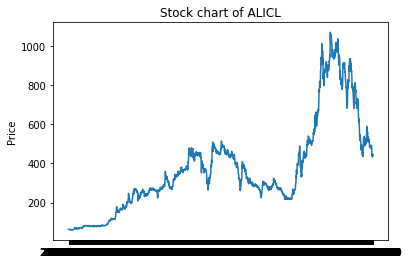

In [4]:
plt.plot(df1)
plt.title('Stock chart of ALICL')
plt.ylabel('Price')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range=(0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

Explaination:

---

Here, we scale the price index between zero(0) and one(1). For this purpose we utilize the MinMaxScaler provided by the sklearn library.
We convert the data into one dimensional numpy array before feeding it to the scaler.

**Train Test Split**

---


We have many ways to split the data into train and test sets.  
But, with time series data, we cannot split the data on random.  
So, here we take 65% of our data as train data and remaining data as test data.

In [6]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[:training_size, :], df1[training_size:len(df1), :]

In [7]:
training_size,test_size

(1553, 837)

Now, we have 1553 instances in our training set and 837 instances in our test set.

Computing Timesteps

---

Timesteps are the number of previous values to use to predict the next value.
[See Example Here](https://prnt.sc/r8--zzZ_Pb2v)  
Now, we convert an array of values into a dataset matrix.

In [8]:
def create_dataset( dataset, time_step=1 ):
  dataX, dataY = [], []
  for i in range( len(dataset) - time_step - 1 ):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

Suppose the initial dataset is as follows:  
`dataset = [10, 12, 14, 16, 18, 20]`  
And, the time step is 3:  
`time_step = 3`  

Iteration 1:
```
i = 0
a = [10, 12, 14]
dataX = [[10, 12, 14]]
dataY = [16]
```

Iteration 2:
```
i = 1
a = [12, 14, 16]
dataX = [[10, 12, 14], [12, 14, 16]]
dataY = [16, 18]
```

Iteration 3:
```
i = 2
a = [14, 16, 18]
dataX = [[10, 12, 14], [12, 14, 16], [14, 16, 18]]
dataY = [16, 18, 20]
```

So, finally we get:
```
x1   x2   x3  | o/p
10   12   14  | 16
12   14   16  | 18
14   16   18  | 20
```

In [9]:
time_step = 100
X_train, y_train = create_dataset( train_data, time_step)
X_test, y_test = create_dataset( test_data, time_step)

In [10]:
X_train.shape, y_train.shape

((1452, 100), (1452,))

In [11]:
X_test.shape, y_test.shape

((736, 100), (736,))

Currently, our data is two dimensional.  
We need to reshape the input into three dimensions to feed into LSTM model.  
Dimension 1: Samples  
Dimension 2: Time Steps  
Dimension 3: Features  

In [12]:
print("X_train before reshape: ")
print(X_train[0])

X_train before reshape: 
[0.00211004 0.00310299 0.00347535 0.00273063 0.0024824  0.00285475
 0.00260651 0.00285475 0.00297887 0.00335123 0.00322711 0.00310299
 0.00173768 0.00173768 0.00049648 0.00012412 0.00086884 0.
 0.         0.00024824 0.00148944 0.00198592 0.0012412  0.00099296
 0.00086884 0.00099296 0.0006206  0.0006206  0.00037236 0.00024824
 0.00012412 0.00099296 0.00024824 0.00074472 0.00086884 0.00086884
 0.00099296 0.00099296 0.00148944 0.00148944 0.00297887 0.00335123
 0.00359947 0.00397183 0.00471655 0.00533715 0.00533715 0.00744719
 0.00992958 0.0106743  0.00968134 0.0106743  0.01166726 0.01166726
 0.00893662 0.00806778 0.00657835 0.00459243 0.00570951 0.00719895
 0.00707483 0.0094331  0.00781954 0.00682659 0.00806778 0.00968134
 0.00633011 0.00446831 0.00670247 0.00781954 0.00806778 0.00794366
 0.00757131 0.00781954 0.00682659 0.00670247 0.00719895 0.00670247
 0.00622088 0.00858536 0.00842773 0.00700904 0.00622088 0.00858536
 0.00953116 0.01142274 0.01047695 0.01094984 

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
print("X_train after reshape: ")
print(X_train[0])

X_train after reshape: 
[[0.00211004]
 [0.00310299]
 [0.00347535]
 [0.00273063]
 [0.0024824 ]
 [0.00285475]
 [0.00260651]
 [0.00285475]
 [0.00297887]
 [0.00335123]
 [0.00322711]
 [0.00310299]
 [0.00173768]
 [0.00173768]
 [0.00049648]
 [0.00012412]
 [0.00086884]
 [0.        ]
 [0.        ]
 [0.00024824]
 [0.00148944]
 [0.00198592]
 [0.0012412 ]
 [0.00099296]
 [0.00086884]
 [0.00099296]
 [0.0006206 ]
 [0.0006206 ]
 [0.00037236]
 [0.00024824]
 [0.00012412]
 [0.00099296]
 [0.00024824]
 [0.00074472]
 [0.00086884]
 [0.00086884]
 [0.00099296]
 [0.00099296]
 [0.00148944]
 [0.00148944]
 [0.00297887]
 [0.00335123]
 [0.00359947]
 [0.00397183]
 [0.00471655]
 [0.00533715]
 [0.00533715]
 [0.00744719]
 [0.00992958]
 [0.0106743 ]
 [0.00968134]
 [0.0106743 ]
 [0.01166726]
 [0.01166726]
 [0.00893662]
 [0.00806778]
 [0.00657835]
 [0.00459243]
 [0.00570951]
 [0.00719895]
 [0.00707483]
 [0.0094331 ]
 [0.00781954]
 [0.00682659]
 [0.00806778]
 [0.00968134]
 [0.00633011]
 [0.00446831]
 [0.00670247]
 [0.007819

## Creating the Stacked LSTM model

---

### What is Stacked LSTM?  
The original LSTM model is comprised of a single hidden LSTM layer followed by a standard feedforward output layer.

The Stacked LSTM is an extension to this model that has multiple hidden LSTM layers where each layer contains multiple memory cells.  
[Read More](https://machinelearningmastery.com/stacked-long-short-term-memory-networks/)

<img src="https://www.researchgate.net/publication/308837697/figure/fig1/AS:588802431143936@1517392847718/Stacked-Deep-LSTM-Network-Architecture.png" height='300'>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 13s 277ms/step - loss: 0.0118 - val_loss: 0.0050
Epoch 2/100
23/23 [==============================] - 5s 231ms/step - loss: 9.6052e-04 - val_loss: 0.0033
Epoch 3/100
23/23 [==============================] - 6s 238ms/step - loss: 5.1461e-04 - val_loss: 0.0033
Epoch 4/100
23/23 [==============================] - 5s 210ms/step - loss: 4.6196e-04 - val_loss: 0.0035
Epoch 5/100
23/23 [==============================] - 5s 210ms/step - loss: 4.5229e-04 - val_loss: 0.0051
Epoch 6/100
23/23 [==============================] - 5s 211ms/step - loss: 4.6013e-04 - val_loss: 0.0037
Epoch 7/100
23/23 [==============================] - 5s 211ms/step - loss: 4.1160e-04 - val_loss: 0.0047
Epoch 8/100
23/23 [==============================] - 5s 236ms/step - loss: 4.2706e-04 - val_loss: 0.0027
Epoch 9/100
23/23 [==============================] - 5s 210ms/step - loss: 4.0502e-04 - val_loss: 0.0035
Epoch 10/100
23/23 [==============================] - 5s 2

In [20]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [21]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 [==============================] - 1s 38ms/step


In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [23]:
import math
from sklearn.metrics import mean_squared_error

In [24]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test, test_predict))

663.4609806097176

# Plotting the results

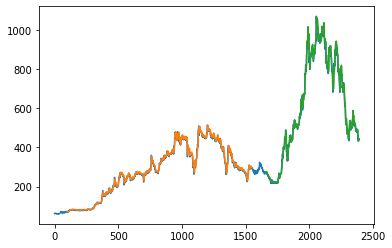

In [25]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
x_input = test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [28]:
# Next 10 days prediction

lst_output = []
n_steps = 100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    y_hat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, y_hat))
    temp_input.extend(y_hat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(y_hat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    y_hat = model.predict(x_input, verbose=0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_hat.tolist())
    i = i+1

print( lst_output )

[0.38319322]
101
1 day input [0.46537047 0.44984897 0.44984897 0.44122591 0.41966827 0.40587138
 0.40414676 0.43165432 0.42397979 0.41794365 0.42311749 0.41363213
 0.41268359 0.40673368 0.40914814 0.3946614  0.37741529 0.39552371
 0.3800022  0.37051684 0.37905367 0.40414676 0.41535674 0.43863899
 0.45631626 0.46450816 0.45933433 0.45847202 0.46709508 0.46192125
 0.47313122 0.46278355 0.44984897 0.42397979 0.43165432 0.44467513
 0.43613831 0.43605207 0.43165432 0.44639974 0.45493657 0.44898666
 0.43691438 0.43346516 0.45243588 0.46192125 0.44829682 0.46959577
 0.48002967 0.47916736 0.52314495 0.5153842  0.50589884 0.50167354
 0.48692811 0.49296425 0.49641347 0.47744275 0.46192125 0.45847202
 0.45674741 0.44553744 0.4705443  0.44726205 0.44821058 0.46019663
 0.45847202 0.45088373 0.45243588 0.44984897 0.44381283 0.43777669
 0.42053057 0.42397979 0.42811886 0.41966827 0.42053057 0.42656671
 0.42734279 0.42397979 0.41966827 0.41363213 0.42053057 0.41527051
 0.4135459  0.41708135 0.42811886

In [29]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 131)

In [30]:
df3 = df1.tolist()
df3.extend(lst_output)

In [31]:
len(df1)

2390

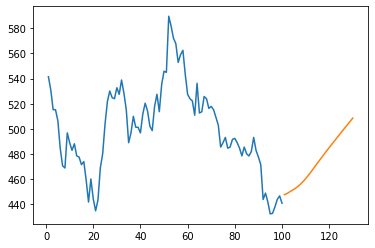

In [32]:
plt.plot(day_new, scaler.inverse_transform(df1[2290:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

Actual Stock Movement

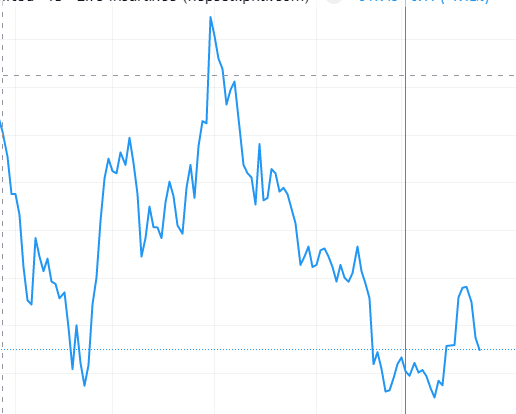